# Regresión lineal: implementación desde cero en Python

## 1. Configuración

In [1]:
ruta = r'C:\Users\yordy\OneDrive\Escritorio\Internet Explorer\deep\learn\assets\datasets\prices.csv'

## 2. Lectura y visualización del set de datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(100)

C:\Users\yordy\AppData\Local\Temp\ipykernel_2364\2369337058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv(ruta)

In [4]:
data.head()

,Area,Precio
0,152.272727,65928.86015
1,102.272727,44477.41849
2,222.727273,95848.62198
3,79.545455,44964.89827
4,86.363636,34367.39122


In [5]:
data.shape

(100, 2)

In [6]:
x1 = data['Area'].values
y = data['Precio'].values

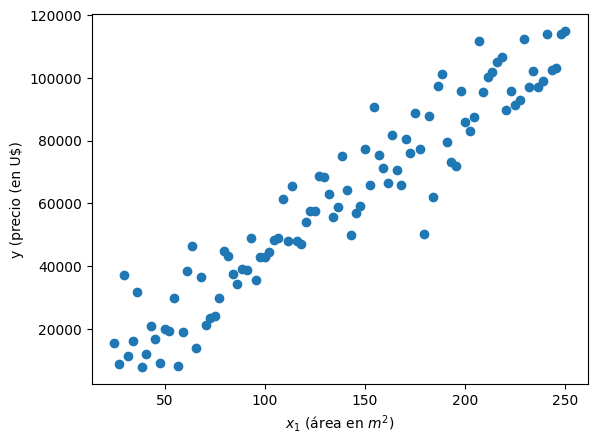

In [7]:
plt.scatter(x1,y)
plt.xlabel('$x_1$ (área en $m^2)$')
plt.ylabel('y (precio (en U$)');

## 3. Funciones para construir el modelo lineal

###3.1 Pérdida

$L(\omega ,b)=\frac{1}{2m}\sum_{i=1}^m [w x_1^{(i)}+b-y^{(i)}]^2$

In [8]:
def calcular_perdida(x,y,w,b,m):
	errores_individuales = np.square([w*x+b-y])
	perdida = np.sum(errores_individuales)/(2*m)

	return perdida

### 3.2 Gradiente descendente

Los parámetros (coeficientes) se actualizan así:

$\omega \leftarrow \omega - \alpha \frac{\partial L(\omega ,b)}{\partial \omega}$

$b \leftarrow b - \alpha \frac{\partial L(\omega ,b)}{\partial b}$

donde las derivadas parciales son:

$\frac{\partial L(\omega ,b)}{\partial \omega} = \frac{1}{m} \sum_{i=1}^m x_1^{(i)} [w \cdot x_1^{(i)} + b - y^{(i)}]$

$\frac{\partial L(\omega ,b)}{\partial b} = \frac{1}{m} \sum_{i=1}^m [w \cdot x_1^{(i)} + b - y^{(i)}]$

In [9]:
def gradiente_descendente(w,b,alpha,x,y,m):
  # dL_w y dL_b
  dL_w = np.sum(x*(w*x+b-y))/m
  dL_b = np.sum(w*x+b-y)/m

  # Actualización de pesos
  w = w - alpha*dL_w
  b = b - alpha*dL_b

  return w,b

### 3.3 Predicción con el modelo ya entrenado

$\hat{y} = w \cdot x_1 + b$

In [10]:
def predecir(x,w,b):
	y_pred = w*x + b

	return y_pred

## 4. Entrenamiento

In [11]:
# Modificar estos hiper-parámetros para observar diferentes comportamientos

nits = 20				# Número de iteraciones
alpha = 0.00001 # Tasa de aprendizaje (0.00001)


In [12]:
def entrenar(x,y,nits,alpha):
	m = x.shape[0] 	# Número de datos de entrenamiento

	# Inicializar pesos (acá np.random.seed(100) garantiza que siempre inicializo en los mismos valores)
	w = np.random.rand()
	b = np.random.rand()

	# Pérdida inicial
	perdida = []
	perdida_i = calcular_perdida(x,y,w,b,m)
	perdida.append(perdida_i)

	# Imprimir valores iniciales
	print('Inicialización. '  + 'Loss: '
			+ str(perdida_i) + ', w: ' + str(w) + ', b: ' + str(b))

	# Entrenamiento
	for it in range(nits):
		# Aplicar gradiente descendente
		w, b = gradiente_descendente(w,b,alpha,x,y,m)

		# Actualizar pérdida
		perdida_it = calcular_perdida(x,y,w,b,m)
		perdida.append(perdida_it)

		# Imprimir en pantalla
		print('Iteración: ' + str(it) + '. ' + 'Loss: '
			+ str(perdida_it) + ', w: ' + str(w) + ', b: ' + str(b))

	return w, b, perdida

In [52]:
# Ejecutar entrenamiento
w, b, perdida = entrenar(x1,y,nits,alpha)

Inicialización. Loss: 2347167102.6536407, w: 0.09205560337723862, b: 0.4634980189371477
Iteración: 0. Loss: 1401820369.4603195, w: 103.50510342748422, b: 1.0775264718896147
Iteración: 1. Loss: 844392499.6875205, w: 182.91490353281222, b: 1.5493558437994048
Iteración: 2. Loss: 515702698.2421656, w: 243.89285979146823, b: 1.91199202227065
Iteración: 3. Loss: 321889307.3967559, w: 290.7171951914647, b: 2.190779884524458
Iteración: 4. Loss: 207606386.79333144, w: 326.67311259285526, b: 2.405181497724649
Iteración: 5. Loss: 140218958.65427977, w: 354.2832850451615, b: 2.5701415804817955
Iteración: 6. Loss: 100483664.43050137, w: 375.4848469007746, b: 2.6971360265161937
Iteración: 7. Loss: 77053572.90075864, w: 391.7653034469632, b: 2.7949770550546633
Iteración: 8. Loss: 63237916.036643684, w: 404.26689449632534, b: 2.8704314774318385
Iteración: 9. Loss: 55091452.96755242, w: 413.8667341005896, b: 2.9286954575719166
Iteración: 10. Loss: 50287855.017763145, w: 421.2383490019117, b: 2.97375907

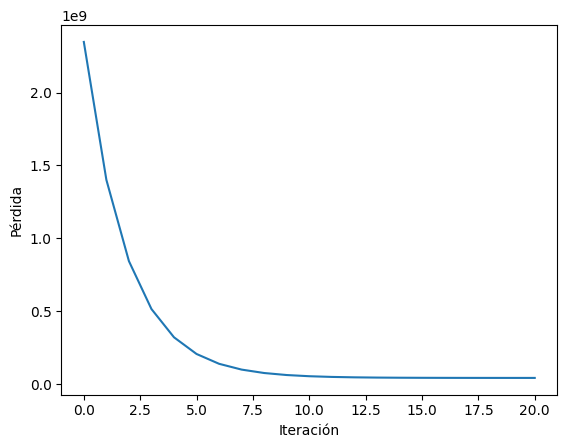

In [53]:
# Dibujar comportamiento del error
plt.plot(perdida)
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.show()

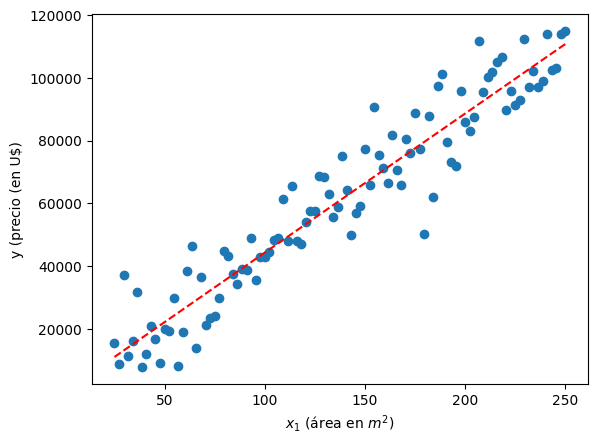

In [55]:
# Dibujar recta resultante
x_pred = np.linspace(x1.min(),x1.max(),x1.shape[0])
y_pred = predecir(x_pred,w,b)

plt.scatter(x1,y)
plt.plot(x_pred,y_pred,'r--')
plt.xlabel('$x_1$ (área en $m^2$)')
plt.ylabel('y (precio (en U$)');